You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

In [17]:
#Use Pandas to import the data from epa-sea-level.csv.
import pandas as pd
df = pd.read_csv("epa-sea-level.csv")
df.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


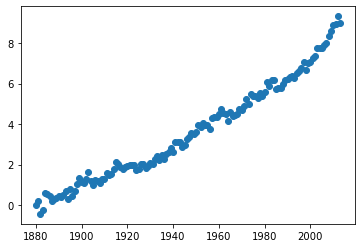

In [11]:
#Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
import matplotlib.pyplot as plt

plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])
plt.show()

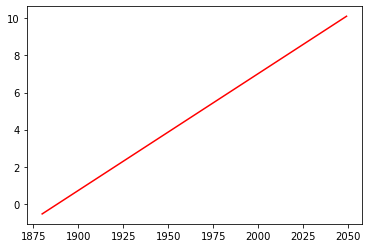

In [12]:
#Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
from scipy.stats import linregress

result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
start_year = df["Year"].min()
end_year = 2050
best_fit_data = {
    "Year": [],
    "y_value": []
}
for year in range(start_year, end_year):
    best_fit_data["Year"] = [year for year in range(start_year, end_year)]
    best_fit_data["y_value"] = [result.slope * year + result.intercept for year in range(start_year, end_year)]
    
plt.plot(best_fit_data["Year"], best_fit_data["y_value"], 'r')

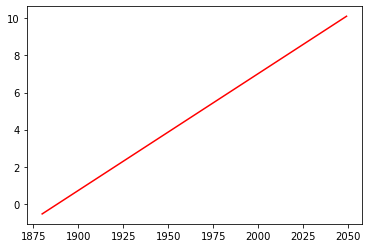

In [13]:
from scipy.stats import linregress

regress = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

# increase data size for future prediction
last_year = df["Year"].max()
df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
plt.plot(
    df["Year"],
    regress.intercept + regress.slope * df["Year"],
    c="r",
    label="fit all",
)

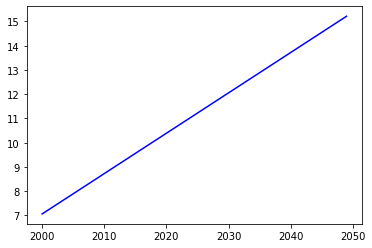

In [18]:
#Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
last_year = df["Year"].max()
df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
bestfit = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
df_recent = df_recent.append(
    [{"Year": y} for y in range(last_year + 1, 2050)]
)
plt.plot(
    df_recent["Year"],
    bestfit.intercept + bestfit.slope * df_recent["Year"],
    c="b",
    label="fit recent",
)

Text(0.5, 1.0, 'Rise in Sea Level')

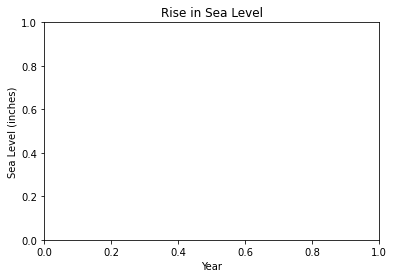

In [19]:
#The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")